# Analisando os Crimes em SP

 **Contexto**
 
     É de senso comum que em grande maioria das cidades brasileiras, a violencia é presente de diversas maneiras em todos dias e horarios nas vidas dos cidadões. Nesse estudo, com a ajuda da Ciência de Dados vamos entender melhor o que acontece e propor algumas sujestões para redução da criminalidade.
 

**Coleta dos dados**

    Os dados utilizados nesse estudos são origens de um aplicativo chamado "Onde fui Roubado", dos anos de 2010-2018. 
 Os dados **não são oficiais**
    

In [19]:
#importando os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#definindo o estilo dos gráficos

Com as bibiliotecas já importadas, é hora de carregar o dataset e analisar!

In [23]:
#carregando os dados
df = pd.read_csv('datasets/dataset-limpo.csv')

#transformando a coluna 'time' em date time, e definindo como indice do dataframe
df.index = pd.to_datetime(df['time'], infer_datetime_format=True)

#verificando as primeiras 5 entradas
df.head()

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,...,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00.000
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-11 18:20:00.000
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,2012-01-11 08:15:00.000


**Dicionário de Variáveis**

    De acordo com a fonte dos dados, essa é a descrição de cada uma das variáveis presentes no dataset.

    id - Número de identificação da ocorrência
    bairro - Bairro onde ocorreu o crime
    created_at - Data de criação da ocorrência
    descricao - Descrição da ocorrência
    endereco - Endereço da ocorrência
    id.1 - Desconhecido
    ip_address_origin - Endereço de IP de quem criou o registro
    latitude - Latitude da ocorrência
    longitude - Longitude da ocorrência
    registrou_bo - Indica se a vítima registrou boletim de ocorrência
    sexo - Sexo da vítima
    tipo_assalto_id - Tipo de assalto
    titulo - Título da ocorrência
    uri - URI do incidente
    user_id - ID do usuário
    valor_prejuizo - Valor do prejuízo em reais
    A partir daqui, temos variáveis que tem como valor True (1) e NaN (Nulo). Mais a frente vamos tratar essas variáveis.

    Quando assinalado sim, significa que o item foi roubado. Caso seja NaN, significa que não foi levado.

    Bicicleta
    Bolsa ou Mochila
    Carteira
    Cartão de Crédito
    Celular
    Computador
    DVD
    Dinheiro
    Documentos
    Equipamento de Som
    Estepe
    MP4 ou Ipod
    Móveis
    Notebook
    Outros
    Relógio
    Som
    Tablet
    Tv
    time - Data e horário do incidente

In [24]:
#verificando as ultimas 3 entradas

df.tail(3)

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2012-03-03 13:15:00,78360,Vila Joao Ramalho,2017-03-04 12:35:27.990,Estava no ônibus voltando pra casa no ponto fi...,"R. Dom Henrique, 2 - Vila Joao Ramalho, Santo ...",78360,177.103.229.244,-23.713219,-46.509625,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-03 13:15:00.000
2012-03-02 21:01:00,3080,Campo Belo,2013-08-16 17:38:04.049,Um carro me seguiu quando saí do supermercado...,"Rua Acalifas, 52 - Campo Belo, São Paulo, 0462...",3080,200.161.48.250,-23.629757,-46.669933,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-03-02 21:01:00.000
2012-03-02 09:44:00,7462,Pinheiros,2013-08-22 01:49:00.275,"Minha mochila estava nas costas, estava quase ...","Avenida Brigadeiro Faria Lima, 919-1029 - Pinh...",7462,177.32.220.159,-23.566382,-46.694075,False,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-02 09:44:00.000


In [26]:
# verificando o tamanho do conjunto
df.shape

(12899, 36)

In [27]:
# verificando informaçoes do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12899 entries, 2010-12-20 20:30:00 to 2012-03-02 09:44:00
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  12899 non-null  int64  
 1   bairro              11196 non-null  object 
 2   created_at          12899 non-null  object 
 3   descricao           12898 non-null  object 
 4   endereco            12899 non-null  object 
 5   id.1                12899 non-null  int64  
 6   ip_address_origin   11705 non-null  object 
 7   latitude            12899 non-null  float64
 8   longitude           12899 non-null  float64
 9   registrou_bo        12375 non-null  object 
 10  sexo                12899 non-null  int64  
 11  tipo_assalto_id     12899 non-null  int64  
 12  titulo              12899 non-null  object 
 13  uri                 12899 non-null  object 
 14  user_id             1166 non-null   float64
 15  valor_prejuizo    

In [28]:
# distribuição estatística das variáveis numéricas
df.describe()

,id,id.1,latitude,longitude,sexo,tipo_assalto_id,user_id,valor_prejuizo
count,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,1166.000000,12899.000000
mean,45901.500194,45901.500194,-23.566805,-46.636817,0.612528,3.230483,16920.901372,2745.264592
std,24974.232979,24974.232979,0.366295,0.439810,0.487192,2.831739,5056.911119,11115.126241
min,21.000000,21.000000,-26.473037,-52.173376,0.000000,1.000000,1900.000000,0.000000
25%,25176.500000,25176.500000,-23.607056,-46.696776,0.000000,2.000000,13039.500000,25.000000
50%,44565.000000,44565.000000,-23.567079,-46.648535,1.000000,2.000000,16914.500000,700.000000
75%,68446.500000,68446.500000,-23.541510,-46.606492,1.000000,3.000000,21038.250000,2000.000000
max,88573.000000,88573.000000,-0.013911,0.004533,1.000000,11.000000,25802.000000,1000000.000000


In [29]:
# distribuição estatística das variáveis categóricas
df.describe(include='O')

,bairro,created_at,descricao,endereco,ip_address_origin,registrou_bo,titulo,uri,Bicicleta,Bolsa ou Mochila,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
count,11196,12899,12898,12899,11705,12375,12899,12899,256,3631,...,324,552,45,764,5243,1350,106,443,178,12899
unique,1577,12899,12898,11986,10432,2,10169,12899,1,1,...,1,1,1,1,1,1,1,1,1,11826
top,São Paulo,2016-01-23 02:12:36.003,dois Marginais roubando na região motocicletas...,Carregando endereço,127.0.0.1,True,Fui assaltado voltando do trabalho,/denuncias/eg2oWV-assaltado-quando-voltava-par...,True,True,...,True,True,True,True,True,True,True,True,True,2014-08-21 19:30:00.000
freq,630,1,1,15,94,7340,154,1,256,3631,...,324,552,45,764,5243,1350,106,443,178,5


* `count` - Contagem de entradas válidas para a variável
* `unique` - Quantidade de entradas únicas
* `top` - Entrada mais comum
* `freq` - Frequência em que a entrada mais comum ocorre

Aqui, podemos tirar algumas informações, como:

* Foram regristrados crimes em 1577 diferentes bairros
* A maioria das pessoas registrou boletim de ocorrência
* O título mais comum para registro de crime foi "*Fui assaltado voltando do trabalho*", o que diz muito sobre a situação da segurança pública na cidade.
* O objeto mais roubado são os **celulares**


**Tratamento de dados**


   Ao limpar/tratar os dados de um dataset, é preciso ter cuidado e entender bem o conjunto de dados. No nosso caso, já identificamos algumas variáveis e linhas com valores ausentes.

   Em algumas das variáveis, a ausência dos valores representa significado. Por exemplo, na variável celular, caso o valor seja True, significa que esse objeto foi levado, e caso seja NaN (nulo, ausente), significa que o objeto não foi levado ou até mesmo esquecido de ser lançado. Precisamos levar isso em consideração na hora de lidar com eles.

**Criando uma copia do Dataset**

É uma boa prática utilizar uma cópia do dataset quando estiver fazendo a limpeza dos dados. Dessa forma, você sempre tem um checkpoint para voltar caso algo dê errado, além de poder sempre usar os dados originais como referência caso precise.


In [32]:
#criando uma cópia do df
df_clean = df.copy()

In [33]:
#colunas booleanas
bool_columns = ['Bicicleta', 'Bolsa ou Mochila', 'Carteira','Cartão de Crédito',
                'Celular', 'Computador','DVD', 'Dinheiro' , 'Documentos',
                'Equipamento de Som','Estepe', 'MP4 ou Ipod', 'Móveis',
                'Notebook','Outros', 'Relógio', 'Som', 'Tablet', 'Tv', 'registrou_bo']

In [35]:
#substituindo NaN por false
df_clean[bool_columns] = df_clean[bool_columns].fillna(False)

In [36]:
#verificando o resultado
df_clean.head()

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,...,False,True,False,True,False,False,True,True,True,2010-12-20 20:30:00.000
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00.000
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00.000
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,...,False,False,False,False,False,False,False,False,False,2012-01-11 18:20:00.000
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,...,False,False,False,True,True,False,False,False,False,2012-01-11 08:15:00.000


Para consertar isso, vamos usar a função fillna(), para preencher os valores ausentes com o valor definido por nós, que no caso será 0. Passaremos o parâmetro inplace=True, para que as mudanças sejam feitas no próprio dataset.

In [39]:

df_clean.fillna(0,inplace=True)

In [40]:
df_clean.head()

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,0,-23.580973,-46.719192,True,...,False,True,False,True,False,False,True,True,True,2010-12-20 20:30:00.000
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00.000
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00.000
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,...,False,False,False,False,False,False,False,False,False,2012-01-11 18:20:00.000
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,...,False,False,False,True,True,False,False,False,False,2012-01-11 08:15:00.000


Agora que limpamos alguns dos valores ausentes, é hora de lidarmos com os outros. Nesse caso, os dados ausentes não possuem significado. Simplesmente estão faltando.

Nesse caso, precisamos anaisar alguns aspectos, como:

A quantidade de linhas com valor ausente para cada variável
O peso dessa variável para a análise
A facilidade de inferir um valor para essas entradas ausentes
O impacto que cada método de preenchimento terá na análise e possíveis modelos de Machine Learning a ser aplicado.

No nosso caso, temos a variável 'user_id', que não tem tanto valor analítico pra nós, e tem mais de 90% das entradas com esse valor faltando. Nesse caso, não seria um problema desconsiderar, e excluir essa variável. Isso é o que faremos.

In [45]:
#chegando a porcetagem de valores ausentes p/ cada variavel
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)

time                  0.0
Tv                    0.0
valor_prejuizo        0.0
user_id               0.0
uri                   0.0
titulo                0.0
tipo_assalto_id       0.0
sexo                  0.0
registrou_bo          0.0
longitude             0.0
latitude              0.0
ip_address_origin     0.0
id.1                  0.0
endereco              0.0
descricao             0.0
created_at            0.0
bairro                0.0
Bicicleta             0.0
Bolsa ou Mochila      0.0
Carteira              0.0
MP4 ou Ipod           0.0
Tablet                0.0
Som                   0.0
Relógio               0.0
Outros                0.0
Notebook              0.0
Móveis                0.0
Estepe                0.0
Cartão de Crédito     0.0
Equipamento de Som    0.0
Documentos            0.0
Dinheiro              0.0
DVD                   0.0
Computador            0.0
Celular               0.0
id                    0.0
dtype: float64

In [46]:
df_clean.head()

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,0,-23.580973,-46.719192,True,...,False,True,False,True,False,False,True,True,True,2010-12-20 20:30:00.000
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00.000
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00.000
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,...,False,False,False,False,False,False,False,False,False,2012-01-11 18:20:00.000
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,...,False,False,False,True,True,False,False,False,False,2012-01-11 08:15:00.000


**Analise Exploratoria**

Proporção entre homens e mulheres
Aqui, não temos documentação oficial do dataset que nos diga qual dos sexo está representado por cada número.

As descrições são um pouco confusas, mas tudo indica que 1 represente o sexo Masculino e 0, o Feminino.

Usando essa informação como referência, vemos que há, proporcionalmente, mais entradas para a classe Homens no universo deste conjunto de dados.

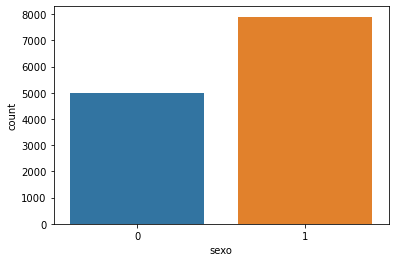

In [47]:
# crimes por sexo
sns.countplot(x='sexo', data=df_clean);

Boletins de Ocorrência
Instrumento vital para o planejamento estratégico da polícia, o Boletim de Ocorrência deveria ser registrado sempre que ocorresse um crime ou tentativa de crime.

Será que essa é a realidade de São Paulo?

Aqui, vemos que a maioria das pessoas registra boletins de ocorrência. Entretanto, o número, e a proporção em relação ao total desse dataset, de pessoas que não registram boletim de ocorrência ainda é mais alto que o ideal.

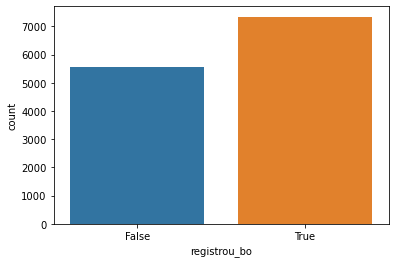

In [48]:
# registro de boletins de ocorrência
sns.countplot(x='registrou_bo', data=df_clean);

Criminalidade por bairros

De acordo com nossos dados, qual é o bairro com maior ocorrência de crimes?

Abaixo, podemos ver que as regiões com maior número de crimes são:

São Paulo (Área central),
Consolação,
Vila Mariana.

In [ ]:
bairros = df_clean.bairro.value_counts()